****************************************************************************************** 

**** data shape:****  (9578, 14)
****************************************************************************************** 

*** Data Info: ****

****************************************************************************************** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non

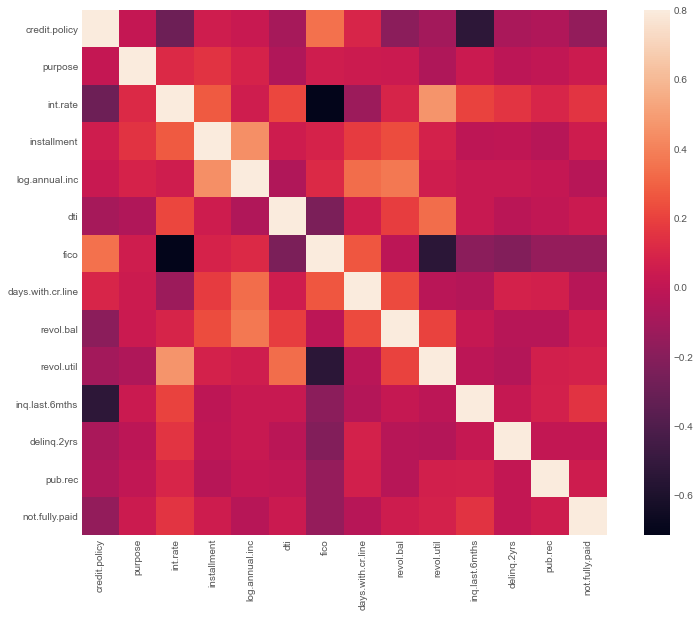

******************************************************************************************


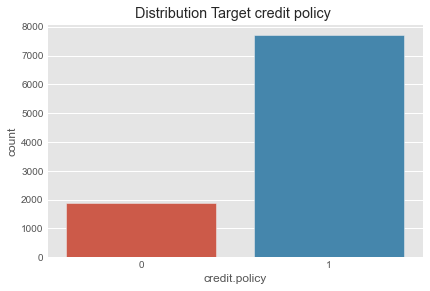

******************************************************************************************
accuracy_Test Ensemble Logistic Regression : 0.902
accuracy_Train Ensemble Logistic Regression : 0.905
******************************************************************************************
accuracy_Test Ensemble K Nearest Neighbours: 0.894
accuracy_Train Ensemble K Nearest Neighbours: 0.948
******************************************************************************************
accuracy_Test Ensemble Classification Tree : 0.838
accuracy_Train Ensemble Classification Tree : 0.848
******************************************************************************************
train  accuracy of VotingClassifier :0.93
Test set accuracy of VotingClassifier :0.90
******************************************************************************************
train  accuracy of bagging Decision Tree:1.00
Test set accuracy of bagging Decision Tree :0.99
*******************************************************

'\n# ******************* *************************************************************************\n#    Grid Search\n# ******************* *************************************************************************\n\nregtree = DecisionTreeClassifier()\n# Define param_grid\n\nparams_dt = {\n    \'max_depth\': [2, 4, 6],\n    \'min_samples_leaf\':[0.1,.16, .18],\n    }\n#0.08,.12, 0.14,\n# Instantiate grid_dt \n \ngrid_dt = GridSearchCV(estimator = regtree, \n                       param_grid= params_dt,\n                       scoring=\'roc_auc\',\n                       cv=3,\n                       n_jobs= 8,verbose=True)\n\n\n# Fit the GridSearchCV object\ngrid_dt.fit(X_train, y_train)\n\n# Extract best hyperparameters from \'grid_dt\' and print them\nbest_hyperparams = grid_dt.best_params_\n\nprint(\'Best hyerparameters:\n\'.center(40))\nprint("="*50)\nprint(best_hyperparams)\nprint("*"*50)\n\n# Extract best CV score from \'grid_dt\'\nbest_CV_score = grid_dt.best_score_\n\nprint(\'B

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
plt.style.use("ggplot")
import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,VotingClassifier,BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, learning_curve,GridSearchCV


from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,roc_auc_score,auc 
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,accuracy_score,roc_curve


from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
                  
######################################################################################################################
#  read Csv giving info Shape Head Describe 
######################################################################################################################


pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)
data1= pd.read_csv("loan_data.csv",encoding="ISO-8859-1")


print("*"*90,'\n')
print('**** data shape:**** ',data1.shape)
print("*"*90,'\n')
print('*** Data Info: ****\n')
print("*"*90,'\n')
print(data1.info(),'\n')
print("*"*90,'\n')
print('*** Data head: ****\n')
print("*"*90,'\n')
print(data1.head(),'\n')
print("*"*90,'\n')
print('*** data describe: ****\n')
print("*"*90,'\n')
print(data1.describe(),'\n')
print("*"*90,'\n')

# *******************    # description Function    *********************************************************

def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary
print(description(data1))
print("*"*90,'\n')
def encoder(data_train):
    le = LabelEncoder()
    imputing = SimpleImputer(strategy='mean')
    Scalling=StandardScaler()
    for col in data_train.columns:
        if data_train[col].dtypes == 'object':
            data_train[col] = le.fit_transform(data_train[col])
           
    return data_train
train_encoded = encoder(data1)
# *****************************    # Nbr Duplicate Value    *********************************************************

print('Entrées dupliquées: {}'.format(data1.duplicated().sum()))
print("*"*90)
# *****************************  Corellation     **********************************************************************
   
corrmat = data1.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);plt.show()
print("*"*90)
######################################################################################################################
#                         Plot Target
######################################################################################################################
# Plot Count Target 
sns.countplot(data1['credit.policy'])
plt.title('Distribution Target credit policy ')
plt.show()
print("*"*90)
######################################################################################################################
#                         Train & Test Set
######################################################################################################################
X = train_encoded.drop(columns=['credit.policy'])
y = train_encoded['credit.policy']
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.35,stratify =y, random_state=21)

######################################################################################################################
#                         Imput &Scaling  Data
######################################################################################################################


scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


######################################################################################################################
#                          Ensemble Algorithm
######################################################################################################################

# Instantiate Algoritm
#Using Best parameter from GriSearch  c=0.135
logreg = LogisticRegression(C= 0.135,random_state=1)
knn = KNN(n_neighbors=3) 
dt = DecisionTreeClassifier(min_samples_leaf= 0.13, max_depth=5,max_features='auto',
                            random_state=1)
# Define the list classifiers
classifiers = [('Logistic Regression', logreg), 
               ('K Nearest Neighbours', knn), 
               ('Classification Tree', dt)]

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
    # Predict y_pred
    y_pred = clf.predict(X_test)
    y_pred_Train = clf.predict(X_train)    
    # Calculate accuracy
    accuracy = accuracy_score(y_pred, y_test)    
    accuracy_Train = accuracy_score(y_pred_Train, y_train)    
    # Evaluate clf's accuracy on the test set
    print('accuracy_Test Ensemble {:20}: {:.3f}'.format(clf_name,  accuracy))
    print('accuracy_Train Ensemble {:20}: {:.3f}'.format(clf_name,  accuracy_Train))
    print("*"*90)


# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate acc_test
# -----------------
y_pred = vc.predict(X_test)
y_pred_Train= vc.predict(X_train)
acc_train = accuracy_score(y_pred_Train, y_train)
acc_test = accuracy_score(y_pred, y_test)
print('train  accuracy of VotingClassifier :{:.2f}'.format(acc_train)) 
print('Test set accuracy of VotingClassifier :{:.2f}'.format(acc_test)) 
print("*"*90)


######################################################################################################################
#                          Bagging Algorithm
######################################################################################################################

# Instantiate dt
# ==============
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
# ==============

bc = BaggingClassifier(base_estimator= dt, 
                       n_estimators= 100 ,
                       oob_score=True,
                       random_state=1)

# Fit bc to the training set
# =========================
bc.fit(X_train, y_train)

# Predict test set labels
# -----------------------
y_pred = bc.predict(X_test)
y_pred_Train= bc.predict(X_train)
# Evaluate acc_test
# -----------------
acc_train = accuracy_score(y_pred_Train, y_train)
acc_test = accuracy_score(y_pred, y_test)
print('train  accuracy of bagging Decision Tree:{:.2f}'.format(acc_train)) 
print('Test set accuracy of bagging Decision Tree :{:.2f}'.format(acc_test)) 
print("*"*90)


######################################################################################################################
#                          Random forests Algorithm
######################################################################################################################

rf_reg = RandomForestClassifier(random_state= 1,n_estimators=350,max_features='auto',min_samples_leaf=3)
# Fit 'grid_rf_reg' to the training set
rf_reg.fit(X_train, y_train)

# Predict test set labels
y_pred_Train =rf_reg.predict(X_train)
y_pred = rf_reg.predict(X_test)
# Calculate accuracy
acc_train = accuracy_score(y_pred_Train, y_train)
acc_test = accuracy_score(y_pred, y_test)
print('train  accuracy of Random forests:{:.2f}'.format(acc_train)) 
print('Test set accuracy of Random forests:{:.2f}'.format(acc_test)) 
print("*"*90)

######################################################################################################################
#                          Decision Trees Algorithm
######################################################################################################################

# Using Best parameter from GriSearch  
{'max_depth': 6, 'min_samples_leaf': 0.1}

#clf= DecisionTreeClassifier(criterion='entropy',max_depth=3, min_samples_leaf=0.08)
clf= DecisionTreeClassifier(criterion='gini',max_depth=6, min_samples_leaf=0.1)
# Fit clf to the training set
clf.fit(X_train, y_train)    
   
# Predict y_pred
y_pred = clf.predict(X_test)
y_pred_Train = clf.predict(X_train)
    
# Calculate accuracy
acc_train = accuracy_score(y_pred_Train, y_train)
acc_test = accuracy_score(y_pred, y_test)
print('train  accuracy of   Decision Tree:{:.2f}'.format(acc_train)) 
print('Test set accuracy of Decision Tree :{:.2f}'.format(acc_test)) 
print("*"*90)

######################################################################################################################
#                           Adaboost with a predefined learning rate
######################################################################################################################

# Set Learning rate to 0.1 then fit adaboost 
# ------------------------------------------
ada_lr = AdaBoostClassifier(n_estimators=100,
                              base_estimator=clf, 
                              learning_rate=0.1, 
                              random_state=1)
ada_lr.fit(X_train, y_train)

# Print the accuracy
# -------------------
ada_lr_acc = ada_lr.score(X_test,y_test)

print("*"*50)
print('The mean accuracy Adaboost is: {:.4f}'.format(ada_lr_acc))
print("*"*50)

# The AUC Score
# -------------
y_pred_adaboost = ada_lr.predict_proba(X_test)

fpr_ab, tpr_ab, thresholds = roc_curve(y_test, y_pred_adaboost[:,1])
auc_adaboost = auc(fpr_ab, tpr_ab)
print ('the AUC Score Adaboost is: {:.4f} '.format(auc_adaboost))
print("*"*50)
######################################################################################################################
#                          GradientBoostingClassifier Algorithm
######################################################################################################################

gbm_model = GradientBoostingClassifier() 
gbm_model.fit(X_train, y_train)
y_pred_gbm = gbm_model.predict(X_test)
print(classification_report(y_test, y_pred_gbm))
print("*"*40)
print("The GBM Accuracy score GradientBoostingClassifier : {:0.4f}".format(accuracy_score(y_test, y_pred_gbm)))
print("The GBM Area Under ROC GradientBoostingClassifier : {:0.4f}".format(roc_auc_score(y_test, y_pred_gbm)))
print("*"*40)

"""
# ******************* *************************************************************************
#    Grid Search
# ******************* *************************************************************************

regtree = DecisionTreeClassifier()
# Define param_grid

params_dt = {
    'max_depth': [2, 4, 6],
    'min_samples_leaf':[0.1,.16, .18],
    }
#0.08,.12, 0.14,
# Instantiate grid_dt 
 
grid_dt = GridSearchCV(estimator = regtree, 
                       param_grid= params_dt,
                       scoring='roc_auc',
                       cv=3,
                       n_jobs= 8,verbose=True)


# Fit the GridSearchCV object
grid_dt.fit(X_train, y_train)

# Extract best hyperparameters from 'grid_dt' and print them
best_hyperparams = grid_dt.best_params_

print('Best hyerparameters:\n'.center(40))
print("="*50)
print(best_hyperparams)
print("*"*50)

# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_

print('Best CV accuracy {}'.format(best_CV_score))


# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_

print("*"*50)
print("The best estimator is:")
print("-"*len("The best estimator is:"))
print(best_model)

print("*"*90)
"""

